# NYC Crash Prediction
### Authored By: Jack Harrington Robert Miller, Rodney Wotton, and Anthony Del Rosso
### Date: December 5, 2023

In [1]:
# Import the necessary libraries.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt  

In [2]:
# Load in the dataset
df = pd.read_csv('crash-data.csv')

C:\Users\robmi\AppData\Local\Temp\ipykernel_33608\4074541817.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('crash-data.csv')


# Data Exploration
### Done: check columns, determine shape, identify feature types, count NaN values

In [3]:
# Get a list of the columns
cols = list(df.columns)
cols

['CRASH DATE',
 'CRASH TIME',
 'BOROUGH',
 'ZIP CODE',
 'LATITUDE',
 'LONGITUDE',
 'LOCATION',
 'ON STREET NAME',
 'CROSS STREET NAME',
 'OFF STREET NAME',
 'NUMBER OF PERSONS INJURED',
 'NUMBER OF PERSONS KILLED',
 'NUMBER OF PEDESTRIANS INJURED',
 'NUMBER OF PEDESTRIANS KILLED',
 'NUMBER OF CYCLIST INJURED',
 'NUMBER OF CYCLIST KILLED',
 'NUMBER OF MOTORIST INJURED',
 'NUMBER OF MOTORIST KILLED',
 'CONTRIBUTING FACTOR VEHICLE 1',
 'CONTRIBUTING FACTOR VEHICLE 2',
 'CONTRIBUTING FACTOR VEHICLE 3',
 'CONTRIBUTING FACTOR VEHICLE 4',
 'CONTRIBUTING FACTOR VEHICLE 5',
 'COLLISION_ID',
 'VEHICLE TYPE CODE 1',
 'VEHICLE TYPE CODE 2',
 'VEHICLE TYPE CODE 3',
 'VEHICLE TYPE CODE 4',
 'VEHICLE TYPE CODE 5']

In [4]:
df

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044898,07/03/2023,18:05,NaN,NaN,40.866806,-73.931010,"(40.866806, -73.93101)",RIVERSIDE DRIVE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4648110,Sedan,Sedan,NaN,NaN,NaN
2044899,07/22/2023,21:39,BRONX,10457.0,40.844177,-73.902920,"(40.844177, -73.90292)",EAST 174 STREET,WEBSTER AVENUE,NaN,...,NaN,NaN,NaN,NaN,4648117,Sedan,NaN,NaN,NaN,NaN
2044900,07/02/2023,17:55,MANHATTAN,10006.0,40.711033,-74.014540,"(40.711033, -74.01454)",WEST STREET,LIBERTY STREET,NaN,...,NaN,NaN,NaN,NaN,4648366,Taxi,NaN,NaN,NaN,NaN
2044901,07/22/2023,13:15,QUEENS,11433.0,40.691580,-73.793190,"(40.69158, -73.79319)",110 AVENUE,157 STREET,NaN,...,Driver Inattention/Distraction,NaN,NaN,NaN,4648129,Station Wagon/Sport Utility Vehicle,E-Bike,NaN,NaN,NaN


In [5]:
df.shape

(2044903, 29)

In [6]:
# Generate a list of columns to keep.
columns_to_keep = ['CRASH TIME', 'BOROUGH', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2','CONTRIBUTING FACTOR VEHICLE 1']

# Drop all the other columns
columns_to_drop = [col for col in df.columns if col not in columns_to_keep]
df = df.drop(columns=columns_to_drop)

df

,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
0,2:39,NaN,2.0,0.0,Aggressive Driving/Road Rage,Sedan,Sedan
1,11:45,NaN,1.0,0.0,Pavement Slippery,Sedan,NaN
2,6:55,NaN,0.0,0.0,Following Too Closely,Sedan,Pick-up Truck
3,9:35,BROOKLYN,0.0,0.0,Unspecified,Sedan,NaN
4,8:13,BROOKLYN,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2044898,18:05,NaN,0.0,0.0,Turning Improperly,Sedan,Sedan
2044899,21:39,BRONX,1.0,0.0,Unspecified,Sedan,NaN
2044900,17:55,MANHATTAN,0.0,0.0,Driver Inattention/Distraction,Taxi,NaN
2044901,13:15,QUEENS,1.0,0.0,Driver Inattention/Distraction,Station Wagon/Sport Utility Vehicle,E-Bike


In [7]:
# Remove all rows that have null values.
df = df.dropna()

df

,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2
7,8:17,BRONX,2.0,0.0,Unspecified,Sedan,Sedan
9,14:58,MANHATTAN,0.0,0.0,Passing Too Closely,Sedan,Station Wagon/Sport Utility Vehicle
11,16:50,QUEENS,0.0,0.0,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle
14,23:10,QUEENS,2.0,0.0,Reaction to Uninvolved Vehicle,Sedan,Sedan
15,17:58,BROOKLYN,0.0,0.0,Passing Too Closely,Tanker,Station Wagon/Sport Utility Vehicle
...,...,...,...,...,...,...,...
2044889,14:08,QUEENS,2.0,0.0,Driver Inattention/Distraction,Sedan,Sedan
2044891,14:59,BROOKLYN,0.0,0.0,Unspecified,Van,PK
2044892,13:35,BROOKLYN,0.0,0.0,Unspecified,Sedan,Pick-up Truck
2044893,11:00,BROOKLYN,1.0,0.0,Passing Too Closely,Bike,Sedan


In [8]:
# Get the types for each of the columns.
df.dtypes

CRASH TIME                        object
BOROUGH                           object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
CONTRIBUTING FACTOR VEHICLE 1     object
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
dtype: object

In [9]:
# Convert the number of people killed and injured into severity scores. Injured = 1, Killed = 2
# Five is a arbitary value for the calculation. It could be any number.
df['SEVERITY SCORE'] = df['NUMBER OF PERSONS INJURED'] + (df['NUMBER OF PERSONS KILLED'] * 2)

df

C:\Users\robmi\AppData\Local\Temp\ipykernel_33608\3513439581.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITY SCORE'] = df['NUMBER OF PERSONS INJURED'] + (df['NUMBER OF PERSONS KILLED'] * 2)


,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,SEVERITY SCORE
7,8:17,BRONX,2.0,0.0,Unspecified,Sedan,Sedan,2.0
9,14:58,MANHATTAN,0.0,0.0,Passing Too Closely,Sedan,Station Wagon/Sport Utility Vehicle,0.0
11,16:50,QUEENS,0.0,0.0,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle,0.0
14,23:10,QUEENS,2.0,0.0,Reaction to Uninvolved Vehicle,Sedan,Sedan,2.0
15,17:58,BROOKLYN,0.0,0.0,Passing Too Closely,Tanker,Station Wagon/Sport Utility Vehicle,0.0
...,...,...,...,...,...,...,...,...
2044889,14:08,QUEENS,2.0,0.0,Driver Inattention/Distraction,Sedan,Sedan,2.0
2044891,14:59,BROOKLYN,0.0,0.0,Unspecified,Van,PK,0.0
2044892,13:35,BROOKLYN,0.0,0.0,Unspecified,Sedan,Pick-up Truck,0.0
2044893,11:00,BROOKLYN,1.0,0.0,Passing Too Closely,Bike,Sedan,1.0


In [10]:
# Get the unique values for the severity score.
score_array = df['SEVERITY SCORE'].unique()
score_array = sorted(score_array)
score_array

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 22.0,
 23.0,
 24.0,
 28.0,
 31.0,
 32.0,
 34.0,
 43.0]

In [11]:
# Map severity scores to severity classes
# df['SEVERITY CLASS'] = df['SEVERITY SCORE'].map(lambda x: 0 if x == 0 else (1 if x == 1 else 2))
df['SEVERITY CLASS'] = df['SEVERITY SCORE'].map(lambda x: 0 if x == 0 else 1)

df

C:\Users\robmi\AppData\Local\Temp\ipykernel_33608\4041185338.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SEVERITY CLASS'] = df['SEVERITY SCORE'].map(lambda x: 0 if x == 0 else 1)


,CRASH TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,SEVERITY SCORE,SEVERITY CLASS
7,8:17,BRONX,2.0,0.0,Unspecified,Sedan,Sedan,2.0,1
9,14:58,MANHATTAN,0.0,0.0,Passing Too Closely,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0
11,16:50,QUEENS,0.0,0.0,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0
14,23:10,QUEENS,2.0,0.0,Reaction to Uninvolved Vehicle,Sedan,Sedan,2.0,1
15,17:58,BROOKLYN,0.0,0.0,Passing Too Closely,Tanker,Station Wagon/Sport Utility Vehicle,0.0,0
...,...,...,...,...,...,...,...,...,...
2044889,14:08,QUEENS,2.0,0.0,Driver Inattention/Distraction,Sedan,Sedan,2.0,1
2044891,14:59,BROOKLYN,0.0,0.0,Unspecified,Van,PK,0.0,0
2044892,13:35,BROOKLYN,0.0,0.0,Unspecified,Sedan,Pick-up Truck,0.0,0
2044893,11:00,BROOKLYN,1.0,0.0,Passing Too Closely,Bike,Sedan,1.0,1


# One Hot Encoding of Categorical Values

In [12]:
# Perform one hot encoding on the borough and add it to the dataframe.
df = pd.get_dummies(df, columns=['BOROUGH'])
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND
7,8:17,2.0,0.0,Unspecified,Sedan,Sedan,2.0,1,True,False,False,False,False
9,14:58,0.0,0.0,Passing Too Closely,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0,False,False,True,False,False
11,16:50,0.0,0.0,Turning Improperly,Sedan,Station Wagon/Sport Utility Vehicle,0.0,0,False,False,False,True,False
14,23:10,2.0,0.0,Reaction to Uninvolved Vehicle,Sedan,Sedan,2.0,1,False,False,False,True,False
15,17:58,0.0,0.0,Passing Too Closely,Tanker,Station Wagon/Sport Utility Vehicle,0.0,0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044889,14:08,2.0,0.0,Driver Inattention/Distraction,Sedan,Sedan,2.0,1,False,False,False,True,False
2044891,14:59,0.0,0.0,Unspecified,Van,PK,0.0,0,False,True,False,False,False
2044892,13:35,0.0,0.0,Unspecified,Sedan,Pick-up Truck,0.0,0,False,True,False,False,False
2044893,11:00,1.0,0.0,Passing Too Closely,Bike,Sedan,1.0,1,False,True,False,False,False


In [13]:
# Keep only the top 5 vehicle types for contrbuting vehicle 2.
top_5_vehicle_types = df['VEHICLE TYPE CODE 2'].value_counts().index[:5]
df['VEHICLE TYPE CODE 2'] = df['VEHICLE TYPE CODE 2'].map(lambda x: x if x in top_5_vehicle_types else 'Other')
df = pd.get_dummies(df, columns=['VEHICLE TYPE CODE 2'])
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,VEHICLE TYPE CODE 2_Other,VEHICLE TYPE CODE 2_PASSENGER VEHICLE,VEHICLE TYPE CODE 2_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 2_Sedan,VEHICLE TYPE CODE 2_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 2_UNKNOWN
7,8:17,2.0,0.0,Unspecified,Sedan,2.0,1,True,False,False,False,False,False,False,False,True,False,False
9,14:58,0.0,0.0,Passing Too Closely,Sedan,0.0,0,False,False,True,False,False,False,False,False,False,True,False
11,16:50,0.0,0.0,Turning Improperly,Sedan,0.0,0,False,False,False,True,False,False,False,False,False,True,False
14,23:10,2.0,0.0,Reaction to Uninvolved Vehicle,Sedan,2.0,1,False,False,False,True,False,False,False,False,True,False,False
15,17:58,0.0,0.0,Passing Too Closely,Tanker,0.0,0,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044889,14:08,2.0,0.0,Driver Inattention/Distraction,Sedan,2.0,1,False,False,False,True,False,False,False,False,True,False,False
2044891,14:59,0.0,0.0,Unspecified,Van,0.0,0,False,True,False,False,False,True,False,False,False,False,False
2044892,13:35,0.0,0.0,Unspecified,Sedan,0.0,0,False,True,False,False,False,True,False,False,False,False,False
2044893,11:00,1.0,0.0,Passing Too Closely,Bike,1.0,1,False,True,False,False,False,False,False,False,True,False,False


In [14]:
# Keep only the to 5 contributing factors.
df['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()
df = df[df['CONTRIBUTING FACTOR VEHICLE 1'].isin(['Unspecified', 'Driver Inattention/Distraction', 'Failure to Yield Right-of-Way', 'Following Too Closely', 'Backing Unsafely'])]
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,CONTRIBUTING FACTOR VEHICLE 1,VEHICLE TYPE CODE 1,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,VEHICLE TYPE CODE 2_Other,VEHICLE TYPE CODE 2_PASSENGER VEHICLE,VEHICLE TYPE CODE 2_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 2_Sedan,VEHICLE TYPE CODE 2_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 2_UNKNOWN
7,8:17,2.0,0.0,Unspecified,Sedan,2.0,1,True,False,False,False,False,False,False,False,True,False,False
18,19:43,1.0,0.0,Unspecified,Station Wagon/Sport Utility Vehicle,1.0,1,True,False,False,False,False,False,False,False,True,False,False
24,17:40,1.0,0.0,Unspecified,Sedan,1.0,1,False,False,False,False,True,False,False,False,True,False,False
27,12:54,1.0,0.0,Unspecified,Sedan,1.0,1,False,True,False,False,False,True,False,False,False,False,False
52,12:00,1.0,0.0,Unspecified,Sedan,1.0,1,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044887,10:10,0.0,0.0,Following Too Closely,Sedan,0.0,0,False,False,True,False,False,True,False,False,False,False,False
2044889,14:08,2.0,0.0,Driver Inattention/Distraction,Sedan,2.0,1,False,False,False,True,False,False,False,False,True,False,False
2044891,14:59,0.0,0.0,Unspecified,Van,0.0,0,False,True,False,False,False,True,False,False,False,False,False
2044892,13:35,0.0,0.0,Unspecified,Sedan,0.0,0,False,True,False,False,False,True,False,False,False,False,False


In [15]:
# Perform one hot encoding on the contributing factor and add it to the dataframe.
df = pd.get_dummies(df, columns=['CONTRIBUTING FACTOR VEHICLE 1'])
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,VEHICLE TYPE CODE 1,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,...,VEHICLE TYPE CODE 2_PASSENGER VEHICLE,VEHICLE TYPE CODE 2_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 2_Sedan,VEHICLE TYPE CODE 2_Station Wagon/Sport Utility Vehicle,VEHICLE TYPE CODE 2_UNKNOWN,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction,CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way,CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Unspecified
7,8:17,2.0,0.0,Sedan,2.0,1,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
18,19:43,1.0,0.0,Station Wagon/Sport Utility Vehicle,1.0,1,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
24,17:40,1.0,0.0,Sedan,1.0,1,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
27,12:54,1.0,0.0,Sedan,1.0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
52,12:00,1.0,0.0,Sedan,1.0,1,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044887,10:10,0.0,0.0,Sedan,0.0,0,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2044889,14:08,2.0,0.0,Sedan,2.0,1,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2044891,14:59,0.0,0.0,Van,0.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
2044892,13:35,0.0,0.0,Sedan,0.0,0,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [16]:
#Take only the 5 most popular vehicles
values_to_keep = ['PASSENGER VEHICLE', 'SPORT UTILITY / STATION WAGON', 'TAXI', 'VAN', 'OTHER']
df = df[df['VEHICLE TYPE CODE 1'].isin(values_to_keep)]
df
#Perform one hot encoding on the vehicle and add it to the dataframe
df = pd.get_dummies(df, columns=['VEHICLE TYPE CODE 1'])
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,...,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction,CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way,CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Unspecified,VEHICLE TYPE CODE 1_OTHER,VEHICLE TYPE CODE 1_PASSENGER VEHICLE,VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 1_TAXI,VEHICLE TYPE CODE 1_VAN
984993,0:12,1.0,0.0,1.0,1,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
988430,6:50,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1011415,7:25,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1018058,14:10,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1019604,9:28,0.0,0.0,0.0,0,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924977,17:35,0.0,0.0,0.0,0,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1924978,15:09,0.0,0.0,0.0,0,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1924979,17:30,2.0,0.0,2.0,1,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1955206,7:35,0.0,0.0,0.0,0,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [17]:
# Remove the colon from the crash time and convert it to an integer. All Times are in Military Time
df['CRASH TIME'] = df['CRASH TIME'].str.replace(':', '').astype(int)
#Group these crash times into groups of 4 hours, 6 groups in all
df['CRASH TIME'] = df['CRASH TIME'].map(lambda x: 0 if x <400 else (1 if x <800 else (2 if x < 1200 else (3 if x < 1600 else (4 if x < 2000 else 5)))))
df

,CRASH TIME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,SEVERITY SCORE,SEVERITY CLASS,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,...,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction,CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way,CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Unspecified,VEHICLE TYPE CODE 1_OTHER,VEHICLE TYPE CODE 1_PASSENGER VEHICLE,VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 1_TAXI,VEHICLE TYPE CODE 1_VAN
984993,0,1.0,0.0,1.0,1,False,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
988430,1,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1011415,1,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1018058,3,0.0,0.0,0.0,0,False,False,True,False,False,...,False,True,False,False,False,True,False,False,False,False
1019604,2,0.0,0.0,0.0,0,False,False,True,False,False,...,False,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924977,4,0.0,0.0,0.0,0,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1924978,3,0.0,0.0,0.0,0,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1924979,4,2.0,0.0,2.0,1,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1955206,1,0.0,0.0,0.0,0,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False


# Simple Analysis of Attr 

<Axes: xlabel='CRASH TIME', ylabel='SEVERITY SCORE'>

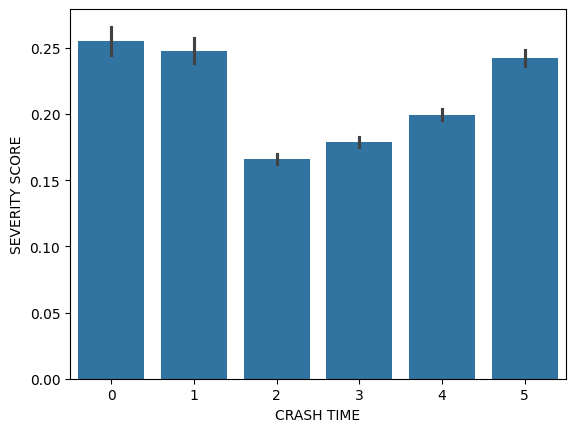

In [18]:
# Graph the severity score vs. the crash time.
sns.barplot(x='CRASH TIME', y='SEVERITY SCORE', data=df)

<Axes: xlabel='SEVERITY CLASS', ylabel='count'>

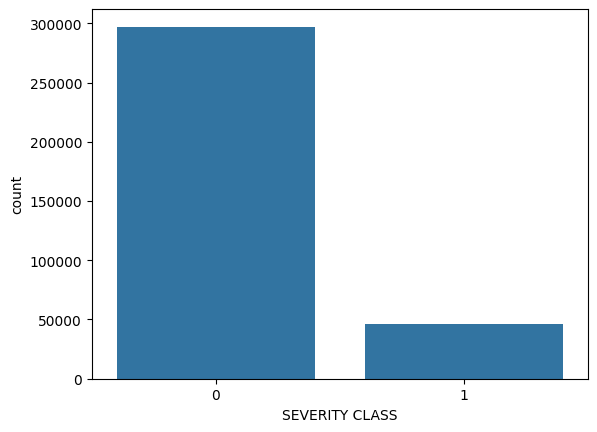

In [19]:
# Graph the count of each severity class.
sns.countplot(x='SEVERITY CLASS', data=df)

# Random Undersampling of Majority Class 0

In [20]:
# Create a attribute dataframe and a target.
attr = df.drop(columns=['SEVERITY SCORE', 'SEVERITY CLASS', 'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED'])

# Score is the target.
target = df['SEVERITY CLASS']

# Instantiate RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy={0: len(df[df['SEVERITY CLASS'] == 0]) // 4}, random_state=77)

# Apply the undersampler to the data.
attr, target = undersampler.fit_resample(attr, target)

In [21]:
attr

,CRASH TIME,BOROUGH_BRONX,BOROUGH_BROOKLYN,BOROUGH_MANHATTAN,BOROUGH_QUEENS,BOROUGH_STATEN ISLAND,VEHICLE TYPE CODE 2_Other,VEHICLE TYPE CODE 2_PASSENGER VEHICLE,VEHICLE TYPE CODE 2_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 2_Sedan,...,CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely,CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction,CONTRIBUTING FACTOR VEHICLE 1_Failure to Yield Right-of-Way,CONTRIBUTING FACTOR VEHICLE 1_Following Too Closely,CONTRIBUTING FACTOR VEHICLE 1_Unspecified,VEHICLE TYPE CODE 1_OTHER,VEHICLE TYPE CODE 1_PASSENGER VEHICLE,VEHICLE TYPE CODE 1_SPORT UTILITY / STATION WAGON,VEHICLE TYPE CODE 1_TAXI,VEHICLE TYPE CODE 1_VAN
1371612,0,True,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False
1365276,4,True,False,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1869221,4,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1427131,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,True,False,False,False
1229860,2,True,False,False,False,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924894,4,False,True,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
1924973,4,False,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
1924975,0,False,True,False,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1924979,4,False,False,False,True,False,False,False,True,False,...,False,False,True,False,False,False,True,False,False,False


In [22]:
target

1371612    0
1365276    0
1869221    0
1427131    0
1229860    0
          ..
1924894    1
1924973    1
1924975    1
1924979    1
2009795    1
Name: SEVERITY CLASS, Length: 120099, dtype: int64

# Scaling the dataset.
### MinMaxScaler() - applied for all classifcation methods other than SVM.
### StandardScaler() - apploed to SVM model.

In [23]:
# MinMax for KNN and NB
scaler = MinMaxScaler()
transformed_data = pd.DataFrame(scaler.fit_transform(attr))
transformed_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.8,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120094,0.8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
120095,0.8,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
120096,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
120097,0.8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
# Regular Scaler for SVM
scaler2 = StandardScaler()
svm_data = pd.DataFrame(scaler2.fit_transform(attr))
svm_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-2.248694,2.580103,-0.718731,-0.489114,-0.626975,-0.237879,-0.565866,-0.905835,2.084661,-0.004081,...,-0.182083,-0.446818,3.604307,-0.041752,-1.637126,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
1,0.704298,2.580103,-0.718731,-0.489114,-0.626975,-0.237879,1.767202,-0.905835,-0.479694,-0.004081,...,-0.182083,-0.446818,-0.277446,-0.041752,0.610827,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
2,0.704298,-0.387581,1.391342,-0.489114,-0.626975,-0.237879,1.767202,-0.905835,-0.479694,-0.004081,...,-0.182083,-0.446818,-0.277446,-0.041752,0.610827,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
3,-2.248694,-0.387581,-0.718731,-0.489114,-0.626975,4.203821,-0.565866,1.103954,-0.479694,-0.004081,...,-0.182083,-0.446818,-0.277446,-0.041752,0.610827,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
4,-0.772198,2.580103,-0.718731,-0.489114,-0.626975,-0.237879,-0.565866,1.103954,-0.479694,-0.004081,...,-0.182083,2.238047,-0.277446,-0.041752,-1.637126,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120094,0.704298,-0.387581,1.391342,-0.489114,-0.626975,-0.237879,-0.565866,1.103954,-0.479694,-0.004081,...,-0.182083,-0.446818,-0.277446,-0.041752,0.610827,-0.187099,-1.301936,1.703371,-0.218698,-0.191208
120095,0.704298,-0.387581,1.391342,-0.489114,-0.626975,-0.237879,1.767202,-0.905835,-0.479694,-0.004081,...,-0.182083,2.238047,-0.277446,-0.041752,-1.637126,-0.187099,-1.301936,1.703371,-0.218698,-0.191208
120096,-2.248694,-0.387581,1.391342,-0.489114,-0.626975,-0.237879,1.767202,-0.905835,-0.479694,-0.004081,...,-0.182083,-0.446818,-0.277446,-0.041752,0.610827,-0.187099,0.768087,-0.587071,-0.218698,-0.191208
120097,0.704298,-0.387581,-0.718731,-0.489114,1.594959,-0.237879,-0.565866,-0.905835,2.084661,-0.004081,...,-0.182083,-0.446818,3.604307,-0.041752,-1.637126,-0.187099,0.768087,-0.587071,-0.218698,-0.191208


In [25]:
# Split the data into training and testing sets.
transformed_data_train, transformed_data_test, target_train, target_test = train_test_split(transformed_data, target, test_size=0.20, random_state=42)
transformed_data_train2, transformed_data_test2, target_train2, target_test2 = train_test_split(svm_data, target, test_size=0.20, random_state=42)

# Classification Models
### KNN, NB, Random Forest, CART, Extra Trees, Gradient Boosting, XGBoost, ADA Boost, CAT Boost, Ridge, Perceptron, ANN, SVM 

In [26]:
# Use Naive Bayes to classify the data. THIS IS FINICKY - May have to be re run, but we got the data at least once!
nb = CategoricalNB()
nb.fit(transformed_data_train, target_train)
target_pred = nb.predict(transformed_data_test)
print(target_pred)
report = classification_report(target_test, target_pred)
print(report)

[0 0 1 ... 0 1 0]
              precision    recall  f1-score   support

           0       0.67      0.86      0.75     14972
           1       0.56      0.30      0.39      9048

    accuracy                           0.65     24020
   macro avg       0.61      0.58      0.57     24020
weighted avg       0.63      0.65      0.61     24020



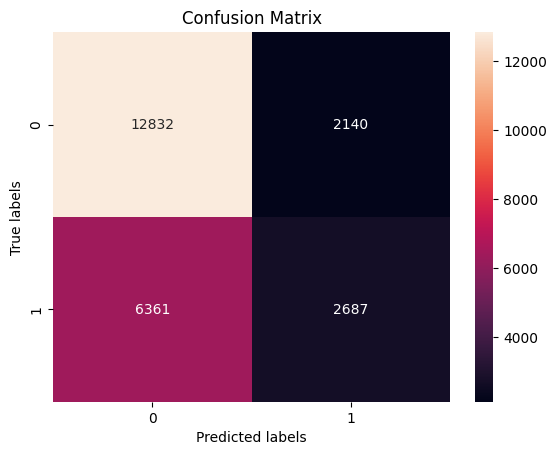

In [27]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [28]:
# Code provided in notes from the professor for knn.
k_values = [2,4,6,8,10]
for k_value in k_values:
    # Perform the knn.
    knn = KNeighborsClassifier(n_neighbors=k_value)
    knn.fit(transformed_data_train, target_train)
    target_pred = knn.predict(transformed_data_test)
    # Print formatting the accuracy.
    report = classification_report(target_test, target_pred)
    print("k = ", k_value)
    print(report)
    print("\n")

k =  2
              precision    recall  f1-score   support

           0       0.64      0.89      0.75     14972
           1       0.50      0.19      0.27      9048

    accuracy                           0.62     24020
   macro avg       0.57      0.54      0.51     24020
weighted avg       0.59      0.62      0.57     24020



k =  4
              precision    recall  f1-score   support

           0       0.66      0.85      0.74     14972
           1       0.52      0.27      0.35      9048

    accuracy                           0.63     24020
   macro avg       0.59      0.56      0.55     24020
weighted avg       0.61      0.63      0.60     24020



k =  6
              precision    recall  f1-score   support

           0       0.66      0.88      0.75     14972
           1       0.55      0.25      0.34      9048

    accuracy                           0.64     24020
   macro avg       0.60      0.56      0.55     24020
weighted avg       0.62      0.64      0.60     2

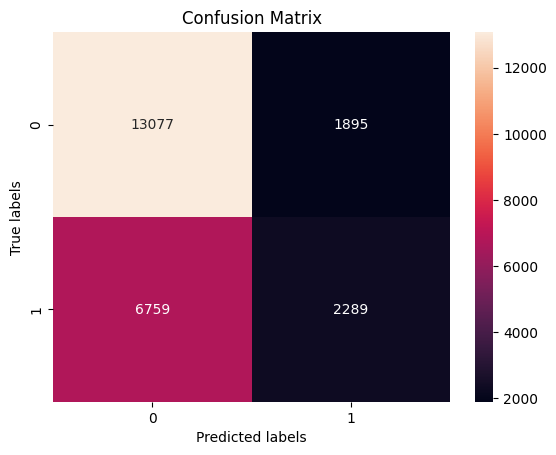

In [29]:
# Generate a confusion matrix. For 10 Neighbors
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [30]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(transformed_data_train, target_train)
target_pred = rf.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75     14972
           1       0.56      0.29      0.38      9048

    accuracy                           0.65     24020
   macro avg       0.61      0.58      0.57     24020
weighted avg       0.63      0.65      0.61     24020



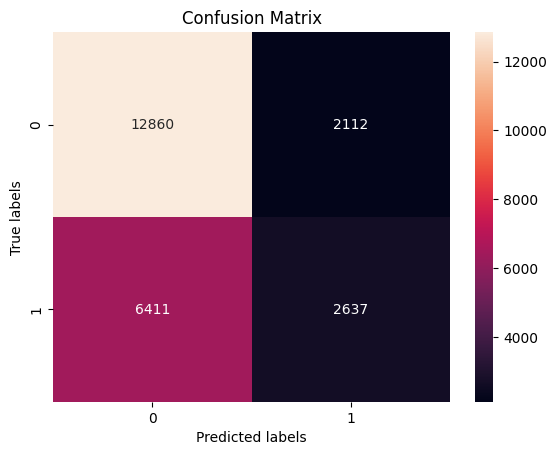

In [31]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [32]:
# CART Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(transformed_data_train, target_train)
target_pred = dt.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.87      0.75     14972
           1       0.56      0.28      0.37      9048

    accuracy                           0.65     24020
   macro avg       0.61      0.57      0.56     24020
weighted avg       0.63      0.65      0.61     24020



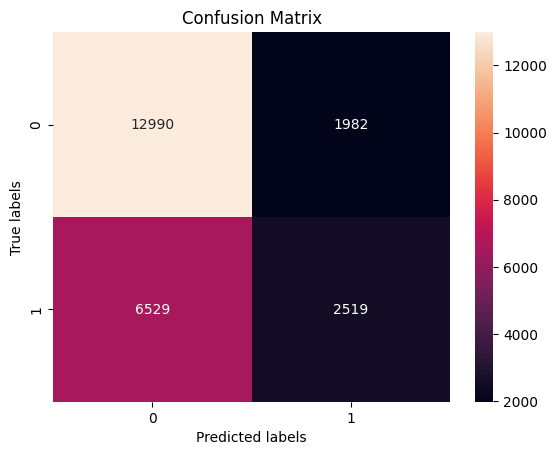

In [33]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [34]:
# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(transformed_data_train, target_train)
target_pred = et.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.87      0.75     14972
           1       0.56      0.28      0.37      9048

    accuracy                           0.65     24020
   macro avg       0.61      0.57      0.56     24020
weighted avg       0.63      0.65      0.61     24020



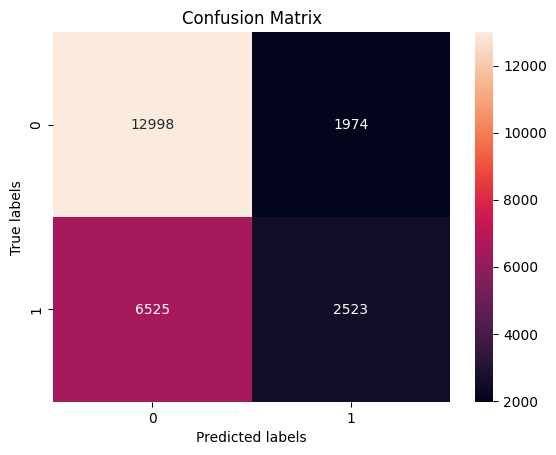

In [35]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [36]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(transformed_data_train, target_train)
target_pred = gb.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.89      0.76     14972
           1       0.59      0.25      0.35      9048

    accuracy                           0.65     24020
   macro avg       0.63      0.57      0.56     24020
weighted avg       0.64      0.65      0.61     24020



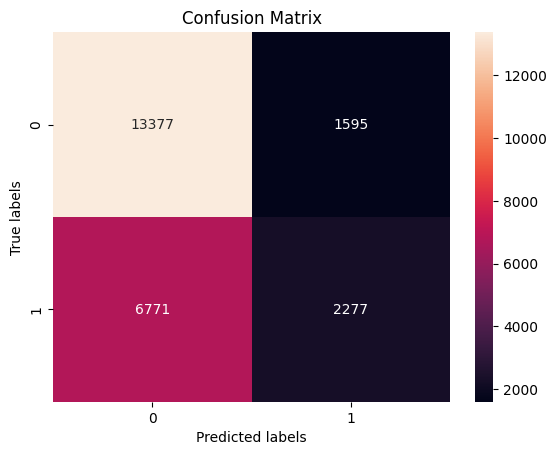

In [37]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [38]:
# XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(transformed_data_train, target_train)
target_pred = xgb.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.87      0.75     14972
           1       0.56      0.28      0.37      9048

    accuracy                           0.65     24020
   macro avg       0.61      0.57      0.56     24020
weighted avg       0.63      0.65      0.61     24020



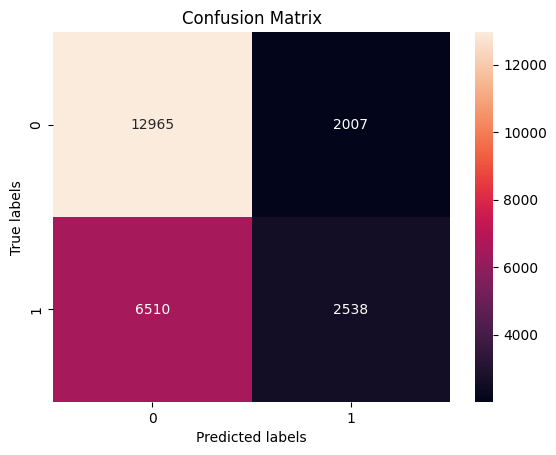

In [39]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [40]:
# Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(transformed_data_train, target_train)
target_pred = ada.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.86      0.75     14972
           1       0.56      0.29      0.38      9048

    accuracy                           0.65     24020
   macro avg       0.62      0.58      0.57     24020
weighted avg       0.63      0.65      0.61     24020



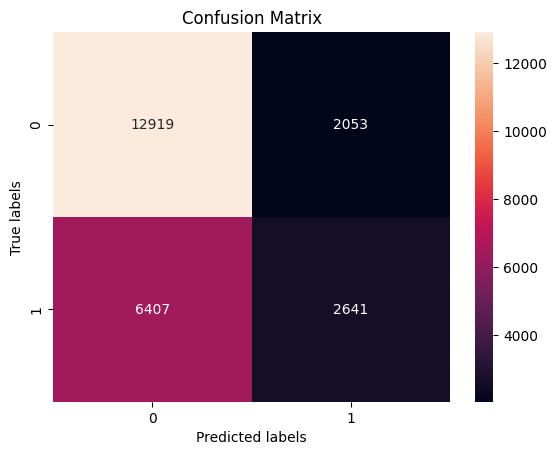

In [41]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [42]:
# Cat Boost
from catboost import CatBoostClassifier
cat = CatBoostClassifier()
cat.fit(transformed_data_train, target_train)
target_pred = cat.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

Learning rate set to 0.072363
0:	learn: 0.6819761	total: 157ms	remaining: 2m 37s
1:	learn: 0.6727542	total: 173ms	remaining: 1m 26s
2:	learn: 0.6645694	total: 185ms	remaining: 1m 1s
3:	learn: 0.6577387	total: 198ms	remaining: 49.3s
4:	learn: 0.6519195	total: 213ms	remaining: 42.3s
5:	learn: 0.6470579	total: 223ms	remaining: 37s
6:	learn: 0.6426612	total: 235ms	remaining: 33.3s
7:	learn: 0.6391568	total: 247ms	remaining: 30.7s
8:	learn: 0.6360190	total: 258ms	remaining: 28.4s
9:	learn: 0.6333555	total: 268ms	remaining: 26.6s
10:	learn: 0.6310600	total: 278ms	remaining: 25s
11:	learn: 0.6291993	total: 288ms	remaining: 23.7s
12:	learn: 0.6274460	total: 300ms	remaining: 22.8s
13:	learn: 0.6259151	total: 311ms	remaining: 21.9s
14:	learn: 0.6246682	total: 321ms	remaining: 21.1s
15:	learn: 0.6235636	total: 330ms	remaining: 20.3s
16:	learn: 0.6224682	total: 340ms	remaining: 19.7s
17:	learn: 0.6215966	total: 351ms	remaining: 19.1s
18:	learn: 0.6208428	total: 362ms	remaining: 18.7s
19:	learn: 0.

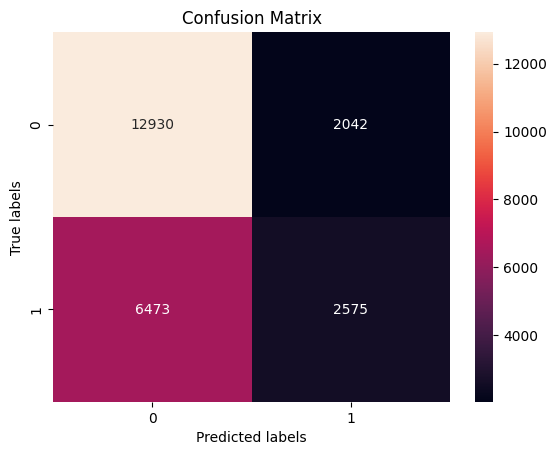

In [43]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [44]:
# Ridge Classifier
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(transformed_data_train, target_train)
target_pred = rc.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.66      0.88      0.76     14972
           1       0.57      0.26      0.36      9048

    accuracy                           0.65     24020
   macro avg       0.62      0.57      0.56     24020
weighted avg       0.63      0.65      0.61     24020



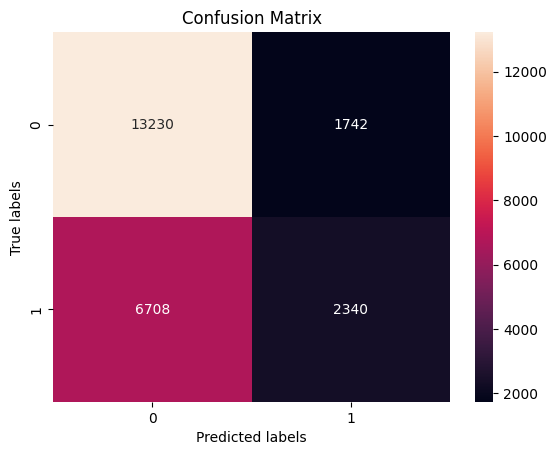

In [45]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [46]:
# Perceptron Classifier
from sklearn.linear_model import Perceptron
pc = Perceptron()
pc.fit(transformed_data_train, target_train)
target_pred = pc.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.74      0.71     14972
           1       0.49      0.40      0.44      9048

    accuracy                           0.62     24020
   macro avg       0.58      0.57      0.58     24020
weighted avg       0.60      0.62      0.61     24020



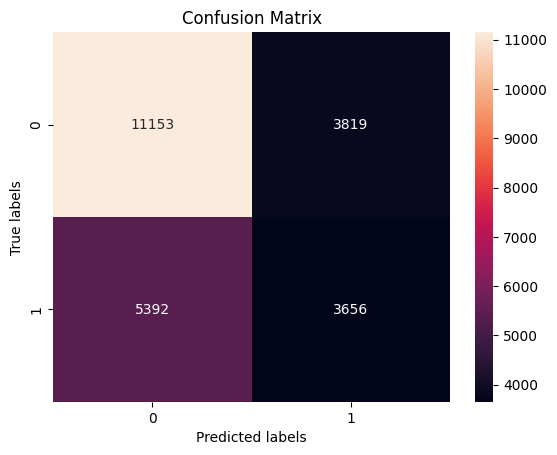

In [47]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [48]:
# Artificial Neural Network
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier()
ann.fit(transformed_data_train, target_train)
target_pred = ann.predict(transformed_data_test)
report = classification_report(target_test, target_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76     14972
           1       0.57      0.28      0.38      9048

    accuracy                           0.65     24020
   macro avg       0.62      0.58      0.57     24020
weighted avg       0.63      0.65      0.61     24020



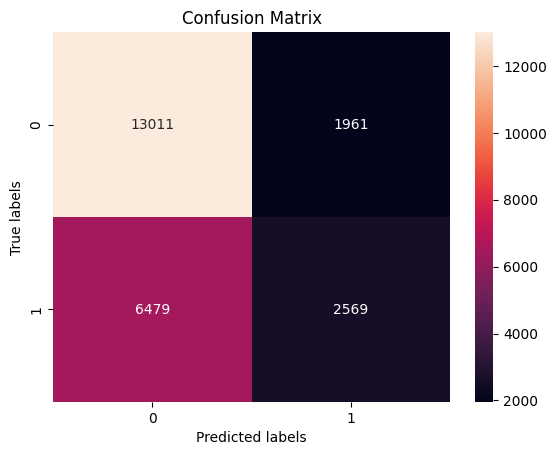

In [49]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [50]:
#Use SVM to classify the Data
svc = SVC() 
svc.fit(transformed_data_train2,target_train2)
svc_pred = svc.predict(transformed_data_test2)
report = classification_report(target_test2, svc_pred)
print(report)

In [ ]:
# Generate a confusion matrix.
cm = confusion_matrix(target_test, target_pred)

# Create heatmap for confusion matrix (from professor's code).
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 